In [1]:
import cv2 as cv
import os
import paddle


class GOALS2022Dataset(paddle.io.Dataset):
    def __init__(self, mode):
        self.mode = mode
        if mode == "Train":
            self.lbound = 1
            self.rbound = 100
        elif mode == "Validation":
            self.lbound = 101
            self.rbound = 200

    def __getitem__(self, i):
        if os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 0
        elif os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 1
        else:
            raise FileNotFoundError

    def __len__(self):
        return self.rbound - self.lbound + 1


train_data = GOALS2022Dataset("Train")
eval_data = GOALS2022Dataset("Validation")
model = paddle.Model(paddle.vision.models.alexnet(num_classes=2))
model.prepare(
    optimizer=paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=paddle.metric.Accuracy(),
)
model.fit(train_data, batch_size=32, epochs=100, verbose=1)
model.evaluate(eval_data)
model.save('alexnet')
model.summary()

W1110 16:52:46.396873 12313 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1110 16:52:46.400583 12313 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/100
step 4/4 [==============================] - loss: 0.7355 - acc: 0.4800 - 691ms/step
Epoch 2/100
step 4/4 [==============================] - loss: 0.6910 - acc: 0.4600 - 419ms/step
Epoch 3/100
step 4/4 [==============================] - loss: 0.3188 - acc: 0.5100 - 422ms/step
Epoch 4/100
step 4/4 [==============================] - loss: 0.1861 - acc: 0.8000 - 429ms/step
Epoch 5/100
step 4/4 [==============================] - loss: 1.1109e-04 - acc: 0.9500 - 425ms/step
Epoch 6/100
step 4/4 [==============================] - loss: 0.0066 - acc: 0.9600 - 417ms/step
Epoch 7/100
step 4/4 [==============================] - loss: 0.0609 - acc: 1.0000 - 418ms/step
Epoch 8/100
step 4/4 [==============================] - loss: 7.7405e-04 - acc: 0.9800 - 429ms/step
Epoch 9/100
step 4/4 [==============================] - loss: 0.0296 - acc: 0.9900 - 431ms/step
Epoch 10/100
step 

{'total_params': 57012034, 'trainable_params': 57012034}

In [2]:
%pip install interpretdl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 926.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 1.0 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 590.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 50.6 kB/s eta 0:00:00a 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
for i in model.network.named_sublayers():
    print(i)

('_conv1', ConvPoolLayer(
  (relu): ReLU()
  (_conv): Conv2D(3, 64, kernel_size=[11, 11], stride=[4, 4], padding=2, data_format=NCHW)
  (_pool): MaxPool2D(kernel_size=3, stride=2, padding=0)
))
('_conv1.relu', ReLU())
('_conv1._conv', Conv2D(3, 64, kernel_size=[11, 11], stride=[4, 4], padding=2, data_format=NCHW))
('_conv1._pool', MaxPool2D(kernel_size=3, stride=2, padding=0))
('_conv2', ConvPoolLayer(
  (relu): ReLU()
  (_conv): Conv2D(64, 192, kernel_size=[5, 5], padding=2, data_format=NCHW)
  (_pool): MaxPool2D(kernel_size=3, stride=2, padding=0)
))
('_conv2.relu', ReLU())
('_conv2._conv', Conv2D(64, 192, kernel_size=[5, 5], padding=2, data_format=NCHW))
('_conv2._pool', MaxPool2D(kernel_size=3, stride=2, padding=0))
('_conv3', Conv2D(192, 384, kernel_size=[3, 3], padding=1, data_format=NCHW))
('_conv4', Conv2D(384, 256, kernel_size=[3, 3], padding=1, data_format=NCHW))
('_conv5', ConvPoolLayer(
  (relu): ReLU()
  (_conv): Conv2D(256, 256, kernel_size=[3, 3], padding=1, data_format=

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/interpretdl/interpreter/abc_interpreter.py:294: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
100%|██████████| 64/64 [00:00<00:00, 249.49it/s]


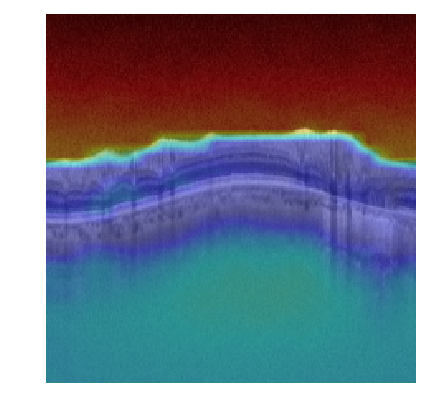

100%|██████████| 64/64 [00:00<00:00, 243.20it/s]


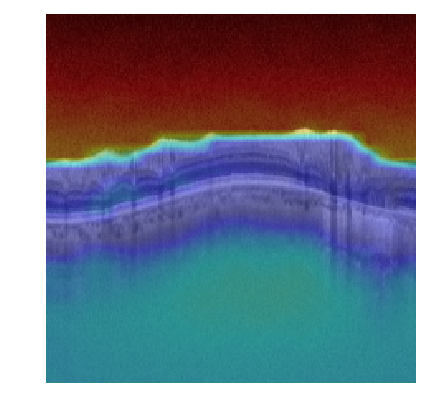

100%|██████████| 64/64 [00:00<00:00, 244.48it/s]


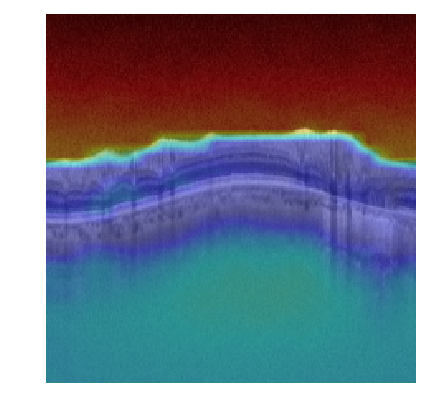

100%|██████████| 64/64 [00:00<00:00, 250.54it/s]


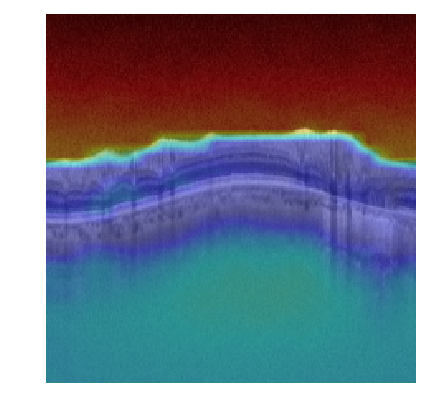

100%|██████████| 64/64 [00:00<00:00, 252.81it/s]


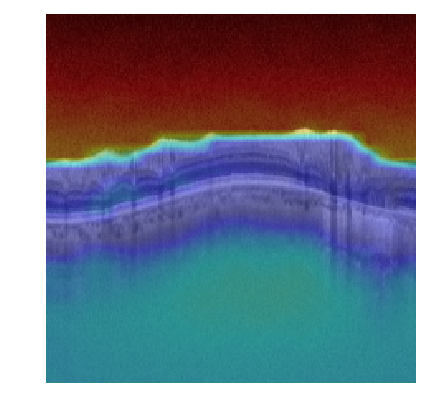

100%|██████████| 64/64 [00:00<00:00, 252.71it/s]


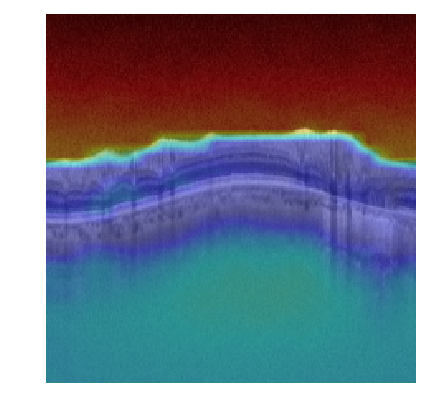

100%|██████████| 64/64 [00:00<00:00, 252.63it/s]


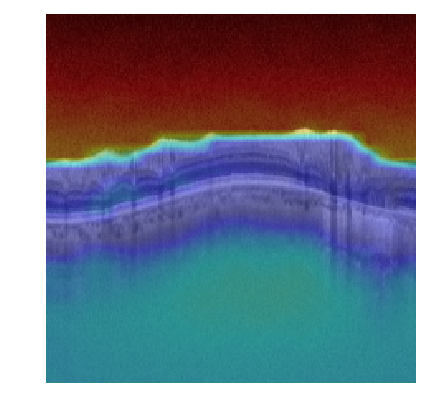

100%|██████████| 64/64 [00:00<00:00, 249.75it/s]


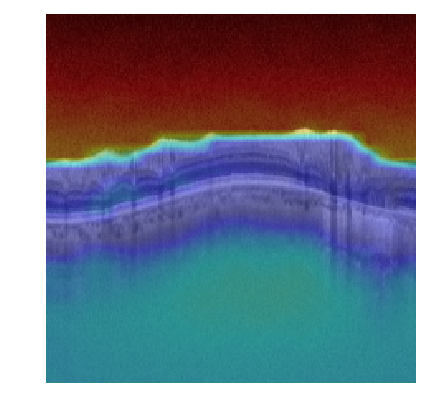

100%|██████████| 64/64 [00:00<00:00, 249.57it/s]


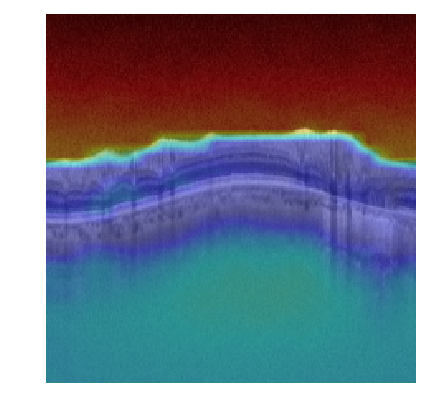

100%|██████████| 64/64 [00:00<00:00, 250.09it/s]


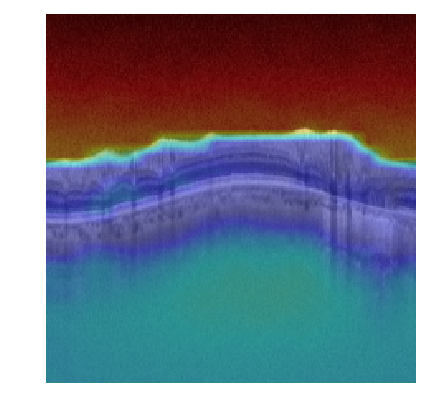

100%|██████████| 64/64 [00:00<00:00, 249.52it/s]


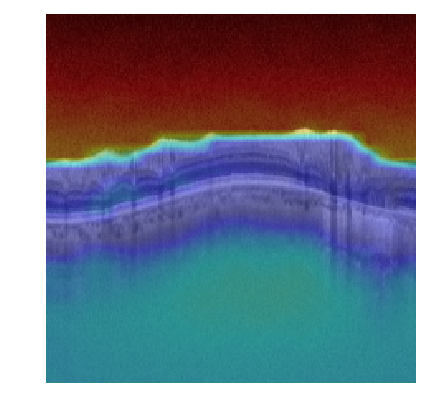

100%|██████████| 64/64 [00:00<00:00, 247.14it/s]


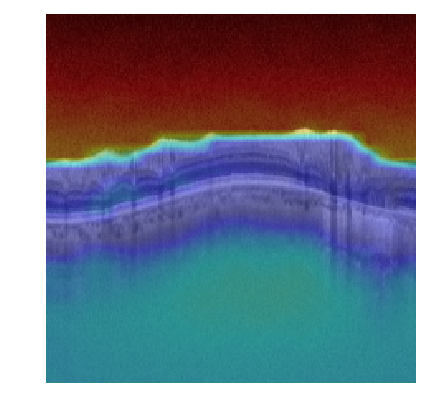

100%|██████████| 64/64 [00:00<00:00, 247.85it/s]


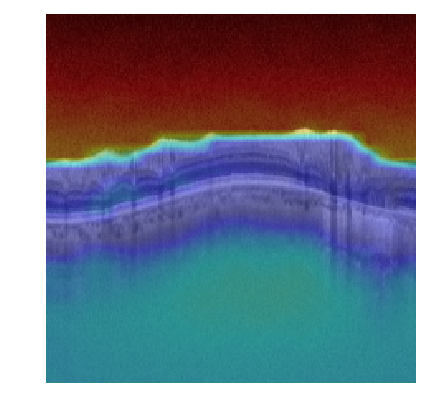

100%|██████████| 64/64 [00:00<00:00, 228.32it/s]


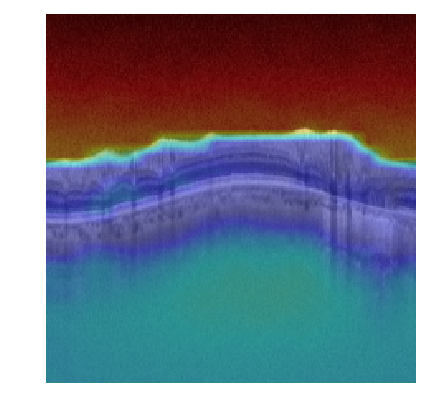

100%|██████████| 64/64 [00:00<00:00, 223.78it/s]


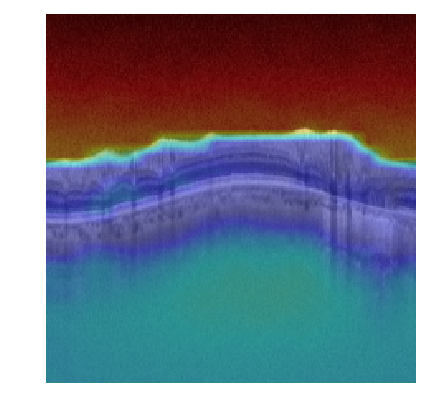

100%|██████████| 64/64 [00:00<00:00, 214.02it/s]


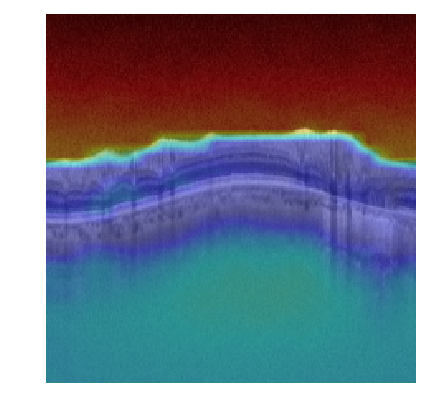

100%|██████████| 64/64 [00:00<00:00, 224.32it/s]


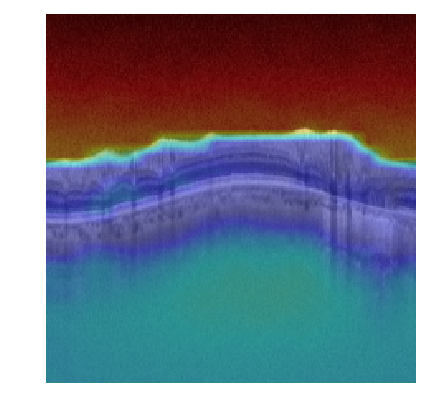

100%|██████████| 64/64 [00:00<00:00, 213.75it/s]


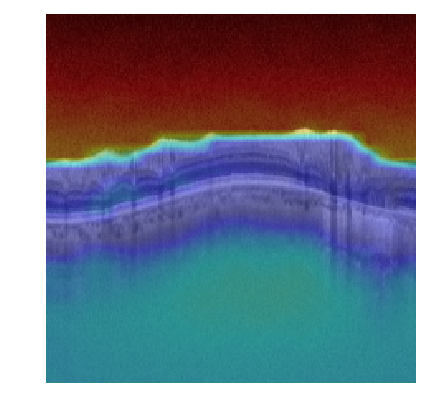

100%|██████████| 64/64 [00:00<00:00, 225.18it/s]


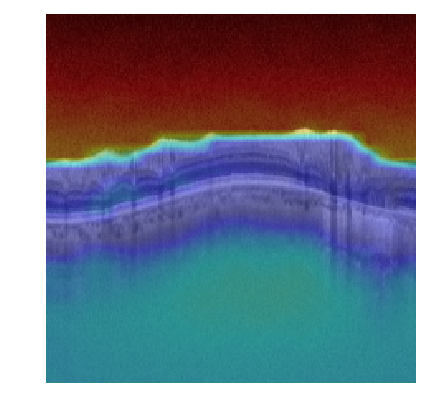

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png')
img = cv.resize(img, (224, 224))
sg = it.ScoreCAMInterpreter(model.network, use_cuda=True)
for n, v in model.network.named_sublayers():
    try:
        sg.interpret(img, target_layer_name=n)
    except:
        print('Except')